스마트워치를 착용하여 6개월 동안 수집된 데이터셋을 활용하여 간단한 신경망을 이용하여 예측 모델을 만들어보겠습니다.

데이터셋에 포함된 특성들은 다음과 같습니다.

* 날짜
* 칼로리 소모량
* 걸음 수
* 이동 거리
* 층수
* 정적인 시간(분)
* 약간 활동적인 시간(분)
* 상당히 활동적인 시간(분)
* 매우 활동적인 시간(분)
* 활동 칼로리

먼저 데이터를 판다스 패키지로 읽어보겠습니다.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fitbit_export_2021.csv', thousands=',')
print(df.columns)

Index(['날짜', '칼로리 소모량', '걸음 수', '이동 거리', '층수', '정적인 시간(분)', '약간 활동적인 시간(분)',
       '상당히 활동적인 시간(분)', '매우 활동적인 시간(분)', '활동 칼로리'],
      dtype='object')


In [3]:
print(df)

               날짜  칼로리 소모량   걸음 수  이동 거리  층수  정적인 시간(분)  약간 활동적인 시간(분)  \
0    2021. 1. 29.     2230   6304   4.79   0        792            159   
1    2021. 1. 30.     2883  13187   9.33   0        671            348   
2    2021. 1. 31.     2756  12702   8.74   0        544            352   
3     2021. 2. 1.     2674   9775   6.81   0        861            294   
4     2021. 2. 2.     1667    538   0.37   0        908             35   
..            ...      ...    ...    ...  ..        ...            ...   
120  2021. 6. 12.     2740  14267   9.79   0       1068            339   
121  2021. 6. 13.     1657   1073   0.73   0       1282             38   
122  2021. 6. 14.     2435   9433   6.46   0        795            183   
123  2021. 6. 15.     1943   3492   2.42   0       1340             81   
124  2021. 6. 16.     2063   4232   2.90   0       1312            120   

     상당히 활동적인 시간(분)  매우 활동적인 시간(분)  활동 칼로리  
0                 0              0     726  
1                26  

### 단층 퍼셉트론 신경망

먼저 단층 퍼셉트론 신경망 모델을 실습하기 위해, 걸음 수를 입력하면 이동 거리를 예측하는 간단한 모델을 만들어보겠습니다. 

다음과 같이 모델 입출력을 구성합니다.
- X: 걸음 수
- Y: 이동 거리

다음과 같이 데이터셋을 구성합니다.
- 훈련셋: 1번째 ~ 100번째 샘플
- 시험셋: 101번째 ~ 125번째 샘플

In [4]:
x = df['걸음 수']
y = df['이동 거리']

x_train = x[:100]
y_train = y[:100]
x_test = x[100:]
y_test = y[100:]

In [5]:
print(x_test)

100     6771
101     8225
102     3853
103     7625
104      377
105     3921
106     9740
107     5761
108     6214
109     4089
110     6325
111     8123
112    10884
113    13917
114    13917
115     6885
116     7629
117     6104
118     3590
119     1897
120    14267
121     1073
122     9433
123     3492
124     4232
Name: 걸음 수, dtype: int64


In [6]:
import matplotlib.pyplot as plt

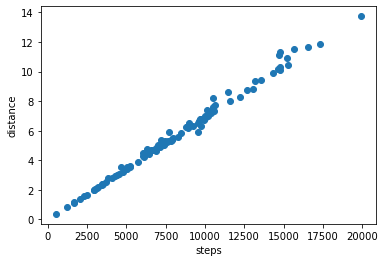

In [7]:
plt.scatter(x_train, y_train)
plt.xlabel('steps')
plt.ylabel('distance')
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([Dense(1, input_dim = 1)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics=['mae'])

In [16]:
model.fit(x_train, y_train, epochs = 100, batch_size = 4)

Epoch 1/100
25/25 [==============================] - 0s 845us/step - loss: 9.5308 - mae: 1.5585
Epoch 2/100
25/25 [==============================] - 0s 831us/step - loss: 14.5758 - mae: 1.9693
Epoch 3/100
25/25 [==============================] - 0s 841us/step - loss: 21.5207 - mae: 1.9978
Epoch 4/100
25/25 [==============================] - 0s 851us/step - loss: 21.4346 - mae: 2.3856
Epoch 5/100
25/25 [==============================] - 0s 867us/step - loss: 27.8060 - mae: 2.1866
Epoch 6/100
25/25 [==============================] - 0s 856us/step - loss: 9.1321 - mae: 2.2293
Epoch 7/100
25/25 [==============================] - 0s 808us/step - loss: 26.6083 - mae: 2.9406
Epoch 8/100
25/25 [==============================] - 0s 852us/step - loss: 29.3672 - mae: 2.6318
Epoch 9/100
25/25 [==============================] - 0s 809us/step - loss: 30.1727 - mae: 2.1134
Epoch 10/100
25/25 [==============================] - 0s 800us/step - loss: 2.2198 - mae: 0.6982
Epoch 11/100
25/25 [============

25/25 [==============================] - 0s 831us/step - loss: 18.9843 - mae: 2.5253
Epoch 85/100
25/25 [==============================] - 0s 777us/step - loss: 25.4082 - mae: 2.7966
Epoch 86/100
25/25 [==============================] - 0s 757us/step - loss: 12.6575 - mae: 2.0474
Epoch 87/100
25/25 [==============================] - 0s 752us/step - loss: 19.7270 - mae: 2.6591
Epoch 88/100
25/25 [==============================] - 0s 814us/step - loss: 15.8364 - mae: 2.1456
Epoch 89/100
25/25 [==============================] - 0s 823us/step - loss: 14.7879 - mae: 2.3281
Epoch 90/100
25/25 [==============================] - 0s 826us/step - loss: 25.7916 - mae: 3.5454
Epoch 91/100
25/25 [==============================] - 0s 853us/step - loss: 16.7164 - mae: 2.2802
Epoch 92/100
25/25 [==============================] - 0s 850us/step - loss: 17.0941 - mae: 2.5128
Epoch 93/100
25/25 [==============================] - 0s 1ms/step - loss: 18.0705 - mae: 2.5854
Epoch 94/100
25/25 [===============

In [17]:
w, b = model.get_weights()

print(w, b)

[[0.00072337]] [-0.26171717]


In [18]:
x_pred = [[10000]]
y_pred = model.predict(x_pred)
print(y_pred)

[[6.971942]]


In [19]:
y_pred = model.predict(x_test)
print(y_pred)

[[ 4.6361933 ]
 [ 5.6879673 ]
 [ 2.5254118 ]
 [ 5.2539477 ]
 [ 0.01099178]
 [ 2.5746007 ]
 [ 6.783867  ]
 [ 3.905594  ]
 [ 4.2332788 ]
 [ 2.6961262 ]
 [ 4.3135724 ]
 [ 5.614184  ]
 [ 7.6113973 ]
 [ 9.8053665 ]
 [ 9.8053665 ]
 [ 4.718657  ]
 [ 5.256841  ]
 [ 4.1537085 ]
 [ 2.3351667 ]
 [ 1.110508  ]
 [10.058545  ]
 [ 0.5144545 ]
 [ 6.5617933 ]
 [ 2.2642767 ]
 [ 2.7995675 ]]


In [20]:
loss, mae = model.evaluate(x_test, y_test)
print(mae)

1/1 [==============================] - 0s 93ms/step - loss: 0.0235 - mae: 0.1303
0.13033510744571686


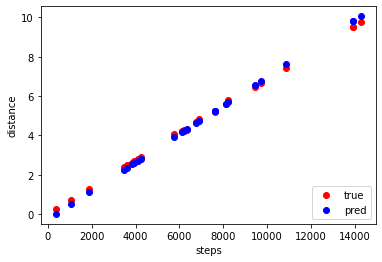

In [21]:
plt.scatter(x_test, y_test, c = 'r', label ='true')
plt.scatter(x_test, y_pred, c = 'b', label ='pred')

plt.xlabel('steps')
plt.ylabel('distance')
plt.legend(loc = 'lower right')

plt.show()

### 다층 퍼셉트론 신경망

다층 퍼셉트론 신경망 모델을 실습하기 위해, 조금 더 복잡한 문제를 풀어보겠습니다. 걸음 수, 이동 거리, 심박수를 입력하면, 칼로리 소모량을 예측하는 것입니다. 

다음과 같이 모델 입출력을 구성합니다.
- X
    - 걸음 수
    - 이동 거리
    - 정적인 시간(분)
    - 약간 활동적인 시간(분)
    - 상당히 활동적인 시간(분)
    - 매우 활동적인 시간(분)
- Y
    - 칼로리 소모량

다음과 같이 데이터셋을 구성합니다.
- 훈련셋: 1번째 ~ 100번째 샘플
- 시험셋: 101번째 ~ 125번째 샘플

In [22]:
x = df[['걸음 수', '이동 거리', '정적인 시간(분)', '약간 활동적인 시간(분)', '상당히 활동적인 시간(분)', '매우 활동적인 시간(분)']]
y = df['칼로리 소모량']

x_train = x[:100]
y_train = y[:100]
x_test = x[100:]
y_test = y[100:]

In [23]:
print(x_test)

      걸음 수  이동 거리  정적인 시간(분)  약간 활동적인 시간(분)  상당히 활동적인 시간(분)  매우 활동적인 시간(분)
100   6771   4.68       1247            149              24             20
101   8225   5.81       1269            120              16             35
102   3853   2.62       1309            122               3              6
103   7625   5.20       1146            187               8             18
104    377   0.26       1371             14               0              0
105   3921   2.68       1373             40               5             22
106   9740   6.68       1229            192               4             15
107   5761   4.05       1304            136               0              0
108   6214   4.28       1276            154               1              9
109   4089   2.80       1261            179               0              0
110   6325   4.30       1281            149               5              5
111   8123   5.58       1153            172               9             18
112  10884   7.44       1

In [24]:
mean = x_train.mean(axis = 0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

print(mean)
print(std)

걸음 수              8166.280
이동 거리                5.718
정적인 시간(분)          992.050
약간 활동적인 시간(분)      207.990
상당히 활동적인 시간(분)      11.820
매우 활동적인 시간(분)       16.050
dtype: float64
걸음 수              4021.631183
이동 거리                2.854176
정적인 시간(분)          242.142390
약간 활동적인 시간(분)       82.894419
상당히 활동적인 시간(분)      13.810682
매우 활동적인 시간(분)       16.014119
dtype: float64


In [26]:
model = Sequential([
    Dense(16, input_dim = 6, activation = 'relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                112       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics=['mae'])

In [28]:
model.fit(x_train, y_train, epochs = 1000, batch_size = 4)

Epoch 1/1000
25/25 [==============================] - 0s 951us/step - loss: 5864177.5000 - mae: 2398.2551
Epoch 2/1000
25/25 [==============================] - 0s 901us/step - loss: 5861300.5000 - mae: 2397.6519
Epoch 3/1000
25/25 [==============================] - 0s 887us/step - loss: 5858167.0000 - mae: 2397.0054
Epoch 4/1000
25/25 [==============================] - 0s 906us/step - loss: 5854452.5000 - mae: 2396.2332
Epoch 5/1000
25/25 [==============================] - 0s 928us/step - loss: 5850030.0000 - mae: 2395.3062
Epoch 6/1000
25/25 [==============================] - 0s 875us/step - loss: 5844681.5000 - mae: 2394.1826
Epoch 7/1000
25/25 [==============================] - 0s 914us/step - loss: 5838536.5000 - mae: 2392.8911
Epoch 8/1000
25/25 [==============================] - 0s 910us/step - loss: 5831504.0000 - mae: 2391.4294
Epoch 9/1000
25/25 [==============================] - 0s 928us/step - loss: 5823457.5000 - mae: 2389.7268
Epoch 10/1000
25/25 [=========================

25/25 [==============================] - 0s 859us/step - loss: 1011023.6250 - mae: 877.5187
Epoch 78/1000
25/25 [==============================] - 0s 892us/step - loss: 969913.2500 - mae: 859.2800
Epoch 79/1000
25/25 [==============================] - 0s 908us/step - loss: 935174.0625 - mae: 844.4944
Epoch 80/1000
25/25 [==============================] - 0s 871us/step - loss: 904259.8125 - mae: 832.6780
Epoch 81/1000
25/25 [==============================] - 0s 831us/step - loss: 876109.6875 - mae: 822.4422
Epoch 82/1000
25/25 [==============================] - 0s 832us/step - loss: 849927.1875 - mae: 811.8095
Epoch 83/1000
25/25 [==============================] - 0s 827us/step - loss: 826724.1875 - mae: 801.6746
Epoch 84/1000
25/25 [==============================] - 0s 864us/step - loss: 805145.9375 - mae: 791.8273
Epoch 85/1000
25/25 [==============================] - 0s 850us/step - loss: 785550.5000 - mae: 781.0369
Epoch 86/1000
25/25 [==============================] - 0s 910us/step

25/25 [==============================] - 0s 906us/step - loss: 84358.1875 - mae: 238.7612
Epoch 155/1000
25/25 [==============================] - 0s 866us/step - loss: 79219.5156 - mae: 231.8093
Epoch 156/1000
25/25 [==============================] - 0s 909us/step - loss: 74843.2500 - mae: 223.2817
Epoch 157/1000
25/25 [==============================] - 0s 889us/step - loss: 70874.8750 - mae: 216.8736
Epoch 158/1000
25/25 [==============================] - 0s 839us/step - loss: 66880.5391 - mae: 209.8153
Epoch 159/1000
25/25 [==============================] - 0s 926us/step - loss: 62794.2266 - mae: 202.3377
Epoch 160/1000
25/25 [==============================] - 0s 918us/step - loss: 59218.2461 - mae: 195.5131
Epoch 161/1000
25/25 [==============================] - 0s 829us/step - loss: 55818.4297 - mae: 190.3715
Epoch 162/1000
25/25 [==============================] - 0s 851us/step - loss: 52518.8633 - mae: 183.5711
Epoch 163/1000
25/25 [==============================] - 0s 874us/step 

Epoch 233/1000
25/25 [==============================] - 0s 915us/step - loss: 6448.6069 - mae: 65.0419
Epoch 234/1000
25/25 [==============================] - 0s 890us/step - loss: 6433.8208 - mae: 65.1577
Epoch 235/1000
25/25 [==============================] - 0s 911us/step - loss: 6440.3818 - mae: 64.6097
Epoch 236/1000
25/25 [==============================] - 0s 865us/step - loss: 6324.7246 - mae: 64.5620
Epoch 237/1000
25/25 [==============================] - 0s 853us/step - loss: 6379.5537 - mae: 64.7612
Epoch 238/1000
25/25 [==============================] - 0s 839us/step - loss: 6168.8999 - mae: 64.0688
Epoch 239/1000
25/25 [==============================] - 0s 824us/step - loss: 6276.9111 - mae: 64.9097
Epoch 240/1000
25/25 [==============================] - 0s 848us/step - loss: 6144.1226 - mae: 63.5470
Epoch 241/1000
25/25 [==============================] - 0s 886us/step - loss: 6109.6211 - mae: 63.3705
Epoch 242/1000
25/25 [==============================] - 0s 914us/step - l

25/25 [==============================] - 0s 910us/step - loss: 5003.7632 - mae: 57.2155
Epoch 313/1000
25/25 [==============================] - 0s 865us/step - loss: 5021.7017 - mae: 57.5634
Epoch 314/1000
25/25 [==============================] - 0s 880us/step - loss: 4930.5483 - mae: 56.8642
Epoch 315/1000
25/25 [==============================] - 0s 888us/step - loss: 4963.0391 - mae: 56.6019
Epoch 316/1000
25/25 [==============================] - 0s 822us/step - loss: 4964.1777 - mae: 57.5306
Epoch 317/1000
25/25 [==============================] - 0s 869us/step - loss: 4945.1968 - mae: 56.4548
Epoch 318/1000
25/25 [==============================] - 0s 883us/step - loss: 4956.6929 - mae: 57.3445
Epoch 319/1000
25/25 [==============================] - 0s 837us/step - loss: 4984.0308 - mae: 57.0290
Epoch 320/1000
25/25 [==============================] - 0s 929us/step - loss: 4933.6714 - mae: 56.6712
Epoch 321/1000
25/25 [==============================] - 0s 849us/step - loss: 4960.5830 

25/25 [==============================] - 0s 866us/step - loss: 4801.2563 - mae: 54.6469
Epoch 392/1000
25/25 [==============================] - 0s 839us/step - loss: 4821.5254 - mae: 54.8227
Epoch 393/1000
25/25 [==============================] - 0s 881us/step - loss: 4775.4663 - mae: 54.7149
Epoch 394/1000
25/25 [==============================] - 0s 875us/step - loss: 4787.1523 - mae: 54.5577
Epoch 395/1000
25/25 [==============================] - 0s 867us/step - loss: 4701.8276 - mae: 54.2694
Epoch 396/1000
25/25 [==============================] - 0s 878us/step - loss: 4860.2744 - mae: 54.9785
Epoch 397/1000
25/25 [==============================] - 0s 889us/step - loss: 4773.0498 - mae: 54.6005
Epoch 398/1000
25/25 [==============================] - 0s 874us/step - loss: 4815.8330 - mae: 54.9528
Epoch 399/1000
25/25 [==============================] - 0s 911us/step - loss: 4768.1045 - mae: 54.1237
Epoch 400/1000
25/25 [==============================] - 0s 849us/step - loss: 4751.2720 

25/25 [==============================] - 0s 907us/step - loss: 4683.4336 - mae: 53.5728
Epoch 471/1000
25/25 [==============================] - 0s 848us/step - loss: 4668.7842 - mae: 53.6572
Epoch 472/1000
25/25 [==============================] - 0s 937us/step - loss: 4730.9062 - mae: 54.5911
Epoch 473/1000
25/25 [==============================] - 0s 850us/step - loss: 4627.2642 - mae: 53.9140
Epoch 474/1000
25/25 [==============================] - 0s 860us/step - loss: 4686.3779 - mae: 53.8028
Epoch 475/1000
25/25 [==============================] - 0s 900us/step - loss: 4723.4497 - mae: 54.5537
Epoch 476/1000
25/25 [==============================] - 0s 888us/step - loss: 4625.8774 - mae: 53.4741
Epoch 477/1000
25/25 [==============================] - 0s 891us/step - loss: 4686.6865 - mae: 54.5445
Epoch 478/1000
25/25 [==============================] - 0s 888us/step - loss: 4652.1890 - mae: 52.7588
Epoch 479/1000
25/25 [==============================] - 0s 842us/step - loss: 4716.1943 

25/25 [==============================] - 0s 895us/step - loss: 4654.4590 - mae: 53.4185
Epoch 550/1000
25/25 [==============================] - 0s 877us/step - loss: 4637.7446 - mae: 54.0165
Epoch 551/1000
25/25 [==============================] - 0s 890us/step - loss: 4657.9907 - mae: 53.7203
Epoch 552/1000
25/25 [==============================] - 0s 883us/step - loss: 4599.4155 - mae: 53.5666
Epoch 553/1000
25/25 [==============================] - 0s 860us/step - loss: 4662.6958 - mae: 53.9287
Epoch 554/1000
25/25 [==============================] - 0s 866us/step - loss: 4622.1670 - mae: 53.6856
Epoch 555/1000
25/25 [==============================] - 0s 896us/step - loss: 4666.5620 - mae: 53.3470
Epoch 556/1000
25/25 [==============================] - 0s 940us/step - loss: 4614.3462 - mae: 52.9567
Epoch 557/1000
25/25 [==============================] - 0s 887us/step - loss: 4645.4341 - mae: 53.6079
Epoch 558/1000
25/25 [==============================] - 0s 914us/step - loss: 4593.9238 

25/25 [==============================] - 0s 938us/step - loss: 4664.4004 - mae: 53.3615
Epoch 629/1000
25/25 [==============================] - 0s 832us/step - loss: 4652.0732 - mae: 53.1611
Epoch 630/1000
25/25 [==============================] - 0s 903us/step - loss: 4600.7324 - mae: 53.7466
Epoch 631/1000
25/25 [==============================] - 0s 862us/step - loss: 4617.1367 - mae: 53.0587
Epoch 632/1000
25/25 [==============================] - 0s 913us/step - loss: 4561.3560 - mae: 53.2730
Epoch 633/1000
25/25 [==============================] - 0s 801us/step - loss: 4641.5410 - mae: 53.5543
Epoch 634/1000
25/25 [==============================] - 0s 817us/step - loss: 4589.8477 - mae: 52.7338
Epoch 635/1000
25/25 [==============================] - 0s 917us/step - loss: 4627.1006 - mae: 53.7402
Epoch 636/1000
25/25 [==============================] - 0s 884us/step - loss: 4513.5620 - mae: 52.0216
Epoch 637/1000
25/25 [==============================] - 0s 912us/step - loss: 4607.4707 

25/25 [==============================] - 0s 835us/step - loss: 4622.4736 - mae: 52.8912
Epoch 708/1000
25/25 [==============================] - 0s 881us/step - loss: 4567.8232 - mae: 52.4287
Epoch 709/1000
25/25 [==============================] - 0s 861us/step - loss: 4586.5322 - mae: 53.5783
Epoch 710/1000
25/25 [==============================] - 0s 843us/step - loss: 4599.4180 - mae: 53.3494
Epoch 711/1000
25/25 [==============================] - 0s 898us/step - loss: 4583.2446 - mae: 53.0357
Epoch 712/1000
25/25 [==============================] - 0s 867us/step - loss: 4613.5962 - mae: 52.6964
Epoch 713/1000
25/25 [==============================] - 0s 873us/step - loss: 4582.5146 - mae: 53.0702
Epoch 714/1000
25/25 [==============================] - 0s 822us/step - loss: 4583.9155 - mae: 53.0465
Epoch 715/1000
25/25 [==============================] - 0s 805us/step - loss: 4555.2129 - mae: 52.3922
Epoch 716/1000
25/25 [==============================] - 0s 890us/step - loss: 4608.4336 

25/25 [==============================] - 0s 848us/step - loss: 4566.2192 - mae: 52.6275
Epoch 787/1000
25/25 [==============================] - 0s 938us/step - loss: 4564.9756 - mae: 51.7567
Epoch 788/1000
25/25 [==============================] - 0s 865us/step - loss: 4564.3330 - mae: 52.3201
Epoch 789/1000
25/25 [==============================] - 0s 893us/step - loss: 4532.9893 - mae: 52.7903
Epoch 790/1000
25/25 [==============================] - 0s 863us/step - loss: 4563.5186 - mae: 52.1864
Epoch 791/1000
25/25 [==============================] - 0s 823us/step - loss: 4549.3120 - mae: 53.0520
Epoch 792/1000
25/25 [==============================] - 0s 933us/step - loss: 4602.8574 - mae: 52.7683
Epoch 793/1000
25/25 [==============================] - 0s 876us/step - loss: 4598.1826 - mae: 53.0387
Epoch 794/1000
25/25 [==============================] - 0s 948us/step - loss: 4511.8813 - mae: 52.2532
Epoch 795/1000
25/25 [==============================] - 0s 896us/step - loss: 4570.0566 

25/25 [==============================] - 0s 878us/step - loss: 4536.8618 - mae: 52.1988
Epoch 866/1000
25/25 [==============================] - 0s 883us/step - loss: 4585.9736 - mae: 53.5543
Epoch 867/1000
25/25 [==============================] - 0s 891us/step - loss: 4590.6001 - mae: 52.7416
Epoch 868/1000
25/25 [==============================] - 0s 806us/step - loss: 4583.4116 - mae: 53.3822
Epoch 869/1000
25/25 [==============================] - 0s 937us/step - loss: 4521.2588 - mae: 52.3069
Epoch 870/1000
25/25 [==============================] - 0s 880us/step - loss: 4556.4355 - mae: 52.4926
Epoch 871/1000
25/25 [==============================] - 0s 892us/step - loss: 4499.4692 - mae: 52.0396
Epoch 872/1000
25/25 [==============================] - 0s 932us/step - loss: 4471.7080 - mae: 52.5808
Epoch 873/1000
25/25 [==============================] - 0s 869us/step - loss: 4576.5283 - mae: 53.4033
Epoch 874/1000
25/25 [==============================] - 0s 838us/step - loss: 4601.5752 

25/25 [==============================] - 0s 831us/step - loss: 4526.1021 - mae: 51.1976
Epoch 945/1000
25/25 [==============================] - 0s 889us/step - loss: 4531.7402 - mae: 53.1681
Epoch 946/1000
25/25 [==============================] - 0s 881us/step - loss: 4586.1475 - mae: 52.7278
Epoch 947/1000
25/25 [==============================] - 0s 864us/step - loss: 4547.8345 - mae: 52.1886
Epoch 948/1000
25/25 [==============================] - 0s 907us/step - loss: 4533.8936 - mae: 52.6439
Epoch 949/1000
25/25 [==============================] - 0s 912us/step - loss: 4570.0801 - mae: 52.3541
Epoch 950/1000
25/25 [==============================] - 0s 919us/step - loss: 4558.3218 - mae: 52.6077
Epoch 951/1000
25/25 [==============================] - 0s 865us/step - loss: 4528.2656 - mae: 52.6096
Epoch 952/1000
25/25 [==============================] - 0s 844us/step - loss: 4583.3838 - mae: 52.1451
Epoch 953/1000
25/25 [==============================] - 0s 851us/step - loss: 4552.7524 

In [30]:
x_test -= mean
x_test /= std
y_pred = model.predict(x_test)

print(y_pred)

[[1807.147 ]
 [1829.13  ]
 [1937.6473]
 [1917.0975]
 [1971.51  ]
 [1674.99  ]
 [1854.9746]
 [1958.2754]
 [1915.7152]
 [2112.489 ]
 [1925.4551]
 [1883.9768]
 [2013.2249]
 [2618.636 ]
 [1546.1993]
 [2106.6165]
 [2078.4622]
 [1960.3901]
 [2037.73  ]
 [1986.7646]
 [2379.035 ]
 [2017.1182]
 [2126.0754]
 [1825.9867]
 [1947.19  ]]


In [31]:
loss, mae = model.evaluate(x_test, y_test)
print(mae)

1/1 [==============================] - 0s 68ms/step - loss: 99700.2266 - mae: 278.2888
278.2888488769531


In [32]:
import numpy as np

In [33]:
np.savetxt('mlp_y_pred.csv', y_pred, fmt = '%f')